In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import math
from sklearn.datasets import make_moons, make_circles

In [2]:
def plot_data(ax,ds,name='',marker = 'o',colors =("#FF0000", '#0000FF'),alpha=0.7, s = 150, facecolor=True):
    X, y = ds

    cm_bright = ListedColormap(colors)
    ax.set_title(name, fontsize = 30)
    if facecolor:
        ax.scatter(X[:, 0], X[:, 1],
                   marker = marker, c=y,
                   cmap=cm_bright,s = s,
                   alpha =alpha)
    else:
        ax.scatter(X[:, 0], X[:, 1],
                   marker = marker, c=y,
                   cmap=cm_bright,s = s,
                   facecolor = 'None',
                   alpha =alpha)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    ax.grid(True)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

In [49]:
X, y = make_moons(noise=0.05, n_samples=1500)
df = pd.DataFrame(X,columns=['feature1', 'feature2'])

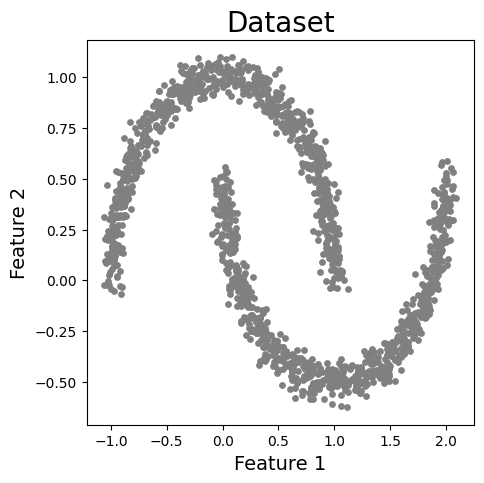

In [50]:
plt.figure(figsize=(5,5))
plt.scatter(df['feature1'],df['feature2'],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

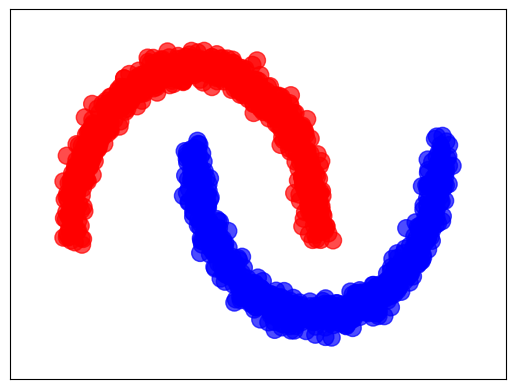

In [69]:
ax = plt.subplot(1, 1, 1)
plot_data(ax,(X,y))

In [51]:
df[['feature1','feature2']]

,feature1,feature2
0,0.616590,0.787133
1,0.374032,0.983822
2,0.718751,0.799705
3,0.787831,0.657303
4,1.033449,-0.462637
...,...,...
1495,-0.331854,0.977565
1496,1.843795,-0.163323
1497,0.480633,0.782921
1498,0.056659,-0.042430


In [52]:
from sklearn import preprocessing
norm= preprocessing.StandardScaler()
X=norm.fit_transform(df[['feature1','feature2']])

In [53]:

from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=2)
nbrs = neighbors.fit(X)
distances, indices = nbrs.kneighbors(df[['feature1','feature2']])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(


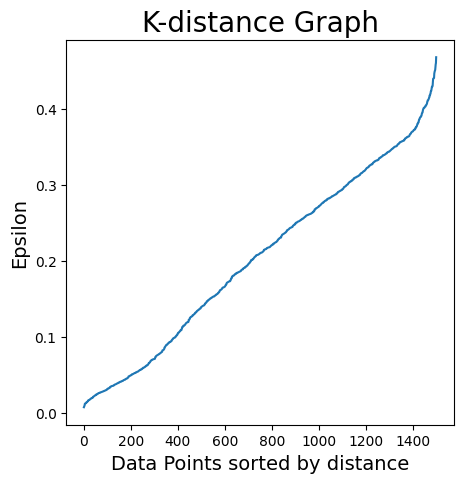

In [54]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(5,5))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [55]:

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

min_sample = range(2,10)
eps = np.arange(0.1, 0.2, 0.01)

output = []

for ms in min_sample:
    for ep in eps:
        # Create DBSCAN with current ms and ep
        labels = DBSCAN(min_samples=ms, eps=ep).fit(X).labels_

        # Calculate the silhouette score, handling noise labels (-1)
        if len(set(labels)) > 1:  # Ensure there is more than one cluster
            score = silhouette_score(X, labels)
            output.append((ms, ep, score))

# Find the best score
min_samples, eps, score = sorted(output, key=lambda x: x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")


Best silhouette_score: 0.3912970968340622
min_samples: 9
eps: 0.18999999999999995


In [60]:
eps=np.linspace(0.1, 0.20,50)
min_sample= [2, 3, 4, 5, 6, 7, 8, 9, 10]

sil_avg = []
max_value = [0, 0, 0, -1]

for i in range(len(eps)):
    for j in range(len(min_sample)):

        db = DBSCAN(min_samples = min_sample[j], eps =eps[i]).fit(X)
        labels = db.labels_
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

        if n_clusters_ > 1:
            silhouette_avg = silhouette_score(df, labels)
            if silhouette_avg > max_value[3]:
                max_value=(eps[i], min_sample[j], n_clusters_, silhouette_avg)
            sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0],
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])



epsilon= 0.11020408163265306 
min_sample= 2 
number of clusters= 2 
average silhouette score= 0.3356


In [61]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN


eps = np.linspace(0.1, 0.2, 100)
min_samples =  [2, 3, 4, 5, 6, 7, 8, 9, 10,12,14,16,18,20]
output = []

for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples=ms, eps=ep).fit(X).labels_
        # Check if more than one cluster exists
        if len(set(labels)) > 1:
            score = silhouette_score(X, labels)
            output.append((ms, ep, score))
        else:
            print(f"Only one cluster found for min_samples={ms}, eps={ep}, skipping silhouette score.")

# Display the results
for result in output:
    print(f"min_samples={result[0]}, eps={result[1]}, silhouette_score={result[2]}")


min_samples=2, eps=0.1, silhouette_score=0.29493459224030527
min_samples=2, eps=0.10101010101010102, silhouette_score=0.29493459224030527
min_samples=2, eps=0.10202020202020202, silhouette_score=0.29493459224030527
min_samples=2, eps=0.10303030303030304, silhouette_score=0.29493459224030527
min_samples=2, eps=0.10404040404040404, silhouette_score=0.29493459224030527
min_samples=2, eps=0.10505050505050506, silhouette_score=0.29493459224030527
min_samples=2, eps=0.10606060606060606, silhouette_score=0.29493459224030527
min_samples=2, eps=0.10707070707070708, silhouette_score=0.11158674104023063
min_samples=2, eps=0.10808080808080808, silhouette_score=0.11158674104023063
min_samples=2, eps=0.1090909090909091, silhouette_score=0.3912970968340622
min_samples=2, eps=0.1101010101010101, silhouette_score=0.3912970968340622
min_samples=2, eps=0.11111111111111112, silhouette_score=0.3912970968340622
min_samples=2, eps=0.11212121212121212, silhouette_score=0.3912970968340622
min_samples=2, eps=0.

In [65]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.11020408163265306 ,min_samples=2)
dbscan.fit(X)

DBSCAN(eps=0.11020408163265306, min_samples=2)

In [66]:
dbscan.labels_

array([0, 0, 0, ..., 0, 1, 1])

In [67]:
def plot_dbscan_clusters(X, labels, show_grid=True):
    # Number of clusters in labels, ignoring noise if present (-1 is for noise)
    unique_labels = set(labels)
    n_clusters = len(unique_labels) - (1 if -1 in labels else 0)

    fig = plt.figure(figsize=(11, 10))

    # Create a color map with a different color for each cluster, including noise
    colors = plt.cm.plasma(np.linspace(0, 1, len(unique_labels)))

    for cluster_label, color in zip(unique_labels, colors):
        if cluster_label == -1:
            # Black used for noise.
            color = [0, 0, 0, 1]
            label_name = 'Noise'
        else:
            label_name = f'Cluster {cluster_label}'

        # Plot all points in the cluster
        cluster_points = X[labels == cluster_label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                    c=[color], label=label_name, s=100, alpha=0.7)

    # Option to show grid
    if show_grid:
        plt.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.xticks([])
    plt.yticks([])
    plt.legend(loc='best', markerscale=1, fontsize=12)
    plt.title(f'DBSCAN Clustering with {n_clusters} Clusters and Noise')
    plt.show()


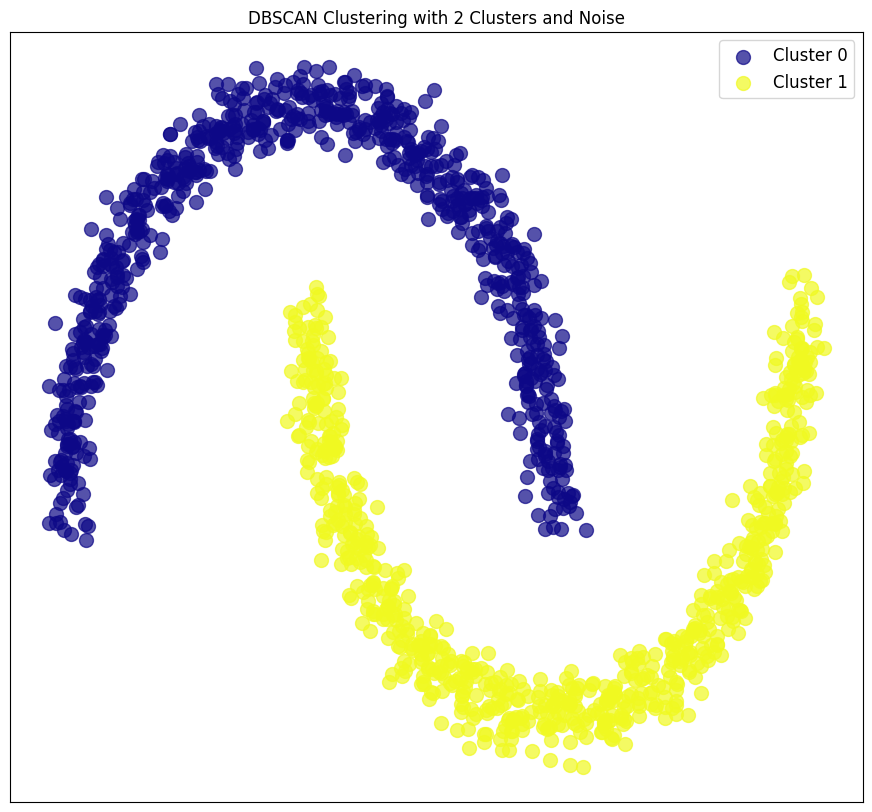

In [68]:
plot_dbscan_clusters(X, dbscan.labels_)